<a href="https://colab.research.google.com/github/irahulcse/Data-Science-Work-For-Quora/blob/master/quora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Quora Data Framework

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud as wc
from nltk.corpus import stopwords
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
from sklearn.ensemble import RandomForestClassifier
import sklearn
import string
import scipy
import numpy
import nltk
import json
import sys
import csv
import os
nltk.download('averaged_perceptron_tagger')
nltk.download("stopwords")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rahul/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /home/rahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

 # Version of the different libraries

In [0]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))


matplotlib: 2.2.2
sklearn: 0.20.2
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.15.1
Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


 # Getting alll the data from nltk stopwords

In [0]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
data = "All work and no play makes jack dull boy. All work and no play makes jack a dull boy."

 # Print the tokenize data

In [0]:
print(word_tokenize(data))
print(sent_tokenize(data))



# stopWords=set(stopwords.words('english'))
# words=word_tokenize(data)
# wordsFiltered=[]

# for w in words:
#     if w in stopWords:
#         wordsFiltered.append(w)
# print(wordsFiltered)

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

words=["game","gaming","gamed","games"]
ps=PorterStemmer()

for word in words:
    print(ps.stem(word))

from nltk.tokenize import PunktSentenceTokenizer

sentences=nltk.sent_tokenize(data)
for set in sentences:
    print(nltk.pos_tag(nltk.word_tokenize(set)))

['All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'dull', 'boy', '.', 'All', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', '.']
['All work and no play makes jack dull boy.', 'All work and no play makes jack a dull boy.']
game
game
game
game
[('All', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN'), ('makes', 'VBZ'), ('jack', 'NN'), ('dull', 'JJ'), ('boy', 'NN'), ('.', '.')]
[('All', 'DT'), ('work', 'NN'), ('and', 'CC'), ('no', 'DT'), ('play', 'NN'), ('makes', 'VBZ'), ('jack', 'RP'), ('a', 'DT'), ('dull', 'JJ'), ('boy', 'NN'), ('.', '.')]


 # How to make the use of the sns i am not able to get it in poproperly

In [0]:
sns.set(style='white',context='notebook',palette="deep")

 # EDA
 ## I will be going to write the diffrent exploratoion technique which can be used to explore the dataset

In [0]:
train=pd.read_csv('/home/rahul/Desktop/Link to rahul_environment/Projects/Machine_Learning Projects/Quora_DataFramework/train.csv')
test=pd.read_csv('/home/rahul/Desktop/Link to rahul_environment/Projects/Machine_Learning Projects/Quora_DataFramework/test.csv')
print('shape of the train',train.shape)
print('shape of the test',test.shape)

train.size # finding the size of the training set
type(train) # tells us about the object type
train.describe() #describe use us about the data
train.sample(5)

shape of the train (1306122, 3)
shape of the test (375806, 2)


,qid,question_text,target
110493,159fe287bb3e73b651fc,My WBJEE SC rank is 1100. Can I get any govern...,0
327575,40355e26e3a036d6e793,What is the temp for 1000 watt microwave for 1...,0
1089095,d56dcd19b5547df89a90,When you say you agree or disagree about the s...,0
710063,8b025d28e63212a9fdaf,Can I embed games written in C++ on a Google w...,0
760391,94fbf5495fcfafd8641e,Does eating goat meat increase the growth of f...,0


 # Data Cleaning
 # for finding that there is any kind of the null element is present or not(sum of the null values)

In [0]:
train.isnull().sum()
# # but if we have the null values used it for finding the result in the dataset
print('Before Dropping the items',train.shape)
train=train.dropna()
print('After droping',train.shape)

Before Dropping the items (1306122, 3)
After droping (1306122, 3)


 # for finding the unique items for the target with command below:
 # getting all the unique from the dataset

In [0]:
train_target=train['target'].values
np.unique(train_target)

train.head(5)

train.tail(5)

train.describe()

,target
count,1.306122e+06
mean,6.187018e-02
std,2.409197e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


** Data preprocessing refers to the transformations applied to our data before feeding it to the algorithm.
 Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis. there are plenty of steps for data preprocessing and we just listed some of them in general(Not just for Quora) :
     removing Target column (id)
     Sampling (without replacement)
     Making part of iris unbalanced and balancing (with undersampling and SMOTE)
     Introducing missing values and treating them (replacing by average values)
     Noise filtering
     Data discretization
     Normalization and standardization
     PCA analysis
     Feature selection (filter, embedded, wrapper)
     Etc.
 now we will be going to perfrom some queries on the dataset**

In [0]:
train.where(train['target']==1).count()


train[train['target']>1]

train.where(train['target']==1).head(5)




,qid,question_text,target
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


** Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.
 Imbalance means that the number of data points available for different the classes is different: If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.
 Now  we will be going to  explore the exploreing  question**

In [0]:
question=train['question_text']
i=0
for q in question[:5]:
        i=i+1
        print("Question came from the Quora Data_set=="+q)

train["num_words"] = train["question_text"].apply(lambda x: len(str(x).split()))

Question came from the Quora Data_set==How did Quebec nationalists see their province as a nation in the 1960s?
Question came from the Quora Data_set==Do you have an adopted dog, how would you encourage people to adopt and not shop?
Question came from the Quora Data_set==Why does velocity affect time? Does velocity affect space geometry?
Question came from the Quora Data_set==How did Otto von Guericke used the Magdeburg hemispheres?
Question came from the Quora Data_set==Can I convert montra helicon D to a mountain bike by just changing the tyres?


 # Some Feature Engineering
 eng_stopwords=set(stopwords.words("english"))
 print(len(eng_stopwords))
 print(eng_stopwords)

Index(['qid', 'question_text', 'target', 'num_words'], dtype='object')


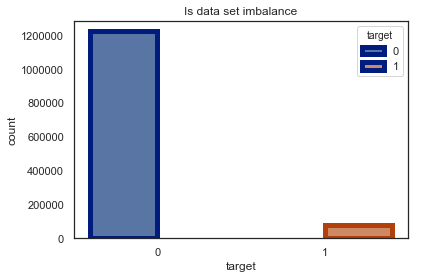

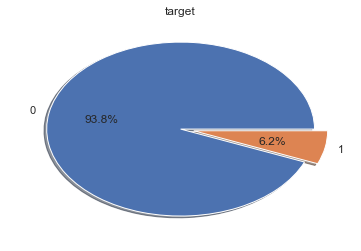

In [0]:
print(train.columns)
train.head()

# # Count Plot
ax=sns.countplot(x='target',hue='target',data=train,linewidth=5,edgecolor=sns.color_palette("dark",3))
plt.title('Is data set imbalance')
plt.show()
plt.savefig('targetsetimbalance')

ax=train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax.set_title('target')
ax.set_ylabel('')
plt.savefig('targetdiagramforpie')
plt.show()
# cf=RandomForestClassifier(n_estimators=)


 # Histogram
 f,ax=plt.subplots(1,2,figsize=(20,10))
 train[train['target']==0].num_words.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
 ax[0].set_title('target=0')
 x1=list(range(0,85,5))
 f,ax=plt.subplots(1,2,figsize=(18,8))
 train[['target','num_words']].groupby(['target']).mean().plot().bar(ax=ax[0])
 ax[0].set_title('num vs target')
 sns.countplot('num_words',hue='target',data=train,ax=ax[1])
 ax[1].set_title('num_words:target=0 vs target=1')
 plt.show()

 # histogram

<Figure size 432x288 with 0 Axes>

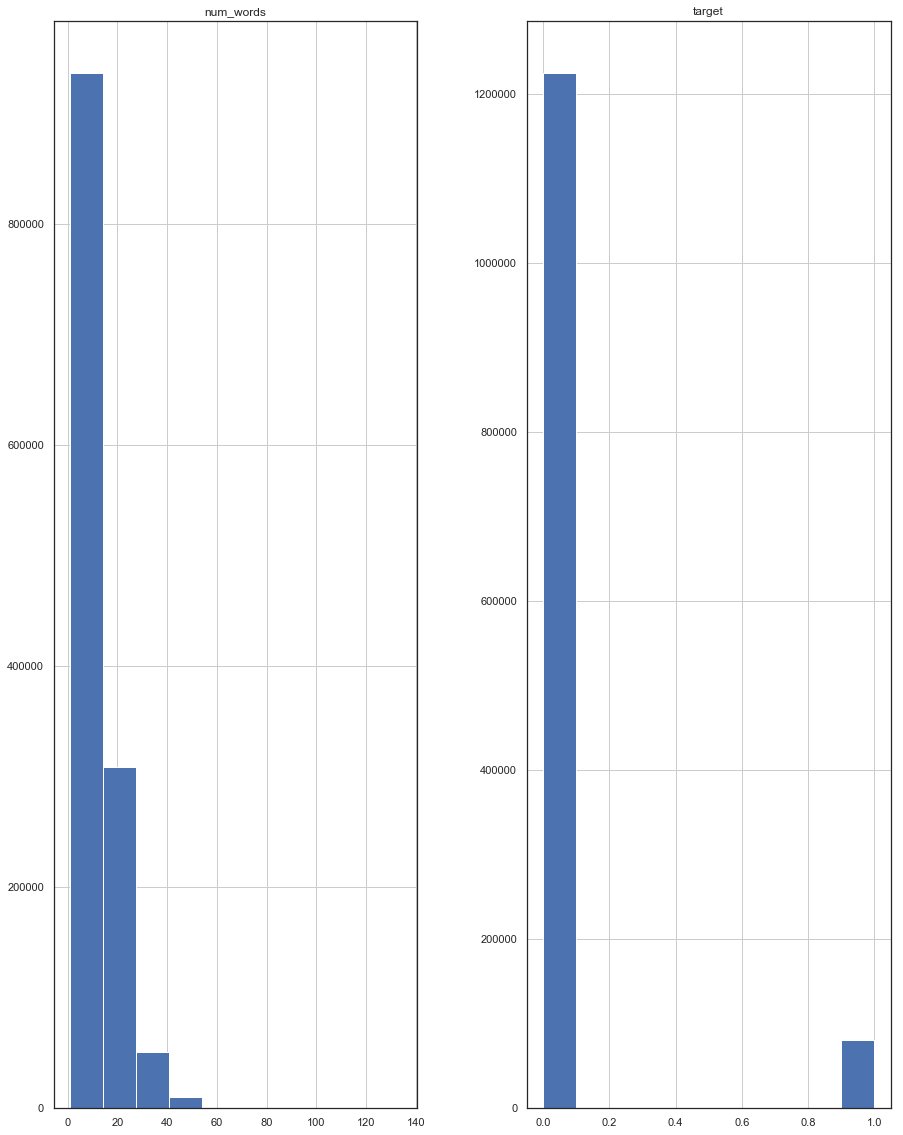

<Figure size 432x288 with 0 Axes>

In [0]:
train.hist(figsize=(15,20))
plt.figure()

# #  Creating the histogram which can be used to make the 

 # Making the violin plot

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


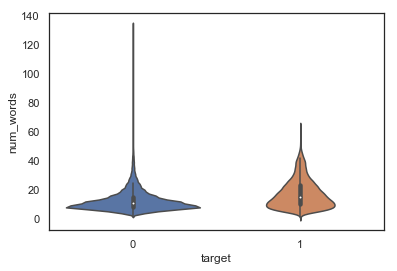

In [0]:
sns.violinplot(data=train,x='target',y='num_words')
plt.savefig('violinplot')


 # Making the kde plot

/home/rahul/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


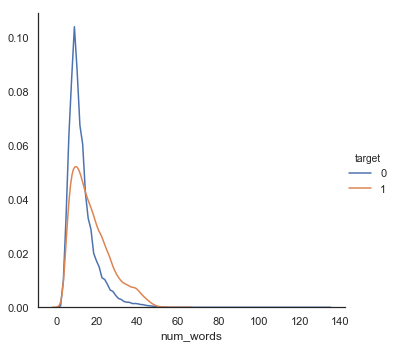

In [0]:
sns.FacetGrid(train,hue="target",size=5).map(sns.kdeplot,"num_words").add_legend()
plt.savefig('facetgrid-target')
plt.show()


 # Box Plot

/home/rahul/.local/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


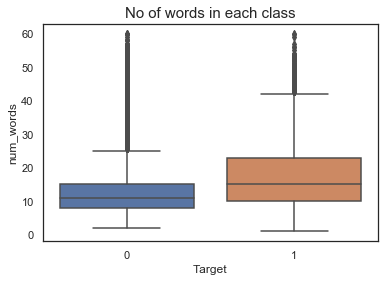

In [0]:
train['num_words'].loc[train['num_words']>60]=60
axes=sns.boxplot(x='target',y='num_words',data=train)
axes.set_xlabel('Target',fontsize=12)
axes.set_title("No of words in each class",fontsize=15)
plt.savefig('target-numwords')
plt.show()

# # How to Generate the Word Cloud in the d plotting we will be going to make the commit 
# eng_stopwords=set(stopwords.words("english"))
# def generate_wordcloud(text): 
#     wordcloud = wc(relative_scaling = 1.0,stopwords = eng_stopwords).generate(text)
#     fig,ax = plt.subplots(1,1,figsize=(10,10))
#     ax.imshow(wordcloud, interpolation='bilinear')
#     ax.axis("off")
#     ax.margins(x=0, y=0)
#     plt.show()
# text=' '.join(train.question_text)
# generate_wordcloud(text)



